In [2]:
import re
import pandas as pd

## 위키에서 가져온 문대통령의 지지율

In [3]:
arl = '''2017년 5월 3주    미조사    81.6%    2018년 5월 3주    76.0%    74.8%
2017년 5월 4주    미조사    84.1%    2018년 5월 4주    76.0%    72.5%
2017년 5월 5주    미조사    78.1%    2018년 5월 5주    75.0%    71.4%
2017년 6월 1주    84.0%    78.9%    2018년 6월 1주    미조사    미조사
2017년 6월 2주    82.0%    75.6%    2018년 6월 2주    79.0%    75.9%
2017년 6월 3주    83.0%    74.2%    2018년 6월 3주    75.0%    75.4%
2017년 6월 4주    79.0%    75.3%    2018년 6월 4주    73.0%    71.5%
2017년 7월 1주    83.0%    76.6%    2018년 7월 1주    71.0%    69.3%
2017년 7월 2주    80.0%    74.6%    2018년 7월 2주    69.0%    68.1%
2017년 7월 3주    74.0%    72.4%    2018년 7월 3주    67.0%    62.9%
2017년 7월 4주    77.0%    74.0%    2018년 7월 4주    62.0%    61.1%
2017년 8월 1주    77.0%    72.5%    2018년 8월 1주    60.0%    63.2%
2017년 8월 2주    78.0%    71.8%    2018년 8월 2주    58.0%    58.1%
2017년 8월 3주    78.0%    72.4%    2018년 8월 3주    60.0%    56.3%
2017년 8월 4주    79.0%    73.9%    2018년 8월 4주    56.0%    56.0%
2017년 8월 5주    76.0%    73.1%    2018년 8월 5주    53.0%    55.2%
2017년 9월 1주    72.0%    69.1%    2018년 9월 1주    49.0%    53.5%
2017년 9월 2주    69.0%    67.1%    2018년 9월 2주    50.0%    53.1%
2017년 9월 3주    70.0%    65.6%    2018년 9월 3주    61.0%    61.9%
2017년 9월 4주    65.0%    67.7%    2018년 9월 4주    미조사    65.3%
2017년 10월 1주    미조사    미조사    2018년 10월 1주    64.0%    62.7%
2017년 10월 2주    73.0%    68.5%    2018년 10월 2주    65.0%    61.9%
2017년 10월 3주    70.0%    67.8%    2018년 10월 3주    62.0%    60.4%
2017년 10월 4주    73.0%    67.2%    2018년 10월 4주    58.0%    58.7%
2017년 11월 1주    73.0%    70.3%    2018년 10월 5주    55.0%    55.6%
2017년 11월 2주    74.0%    70.1%    2018년 11월 1주    54.0%    55.4%
2017년 11월 3주    73.0%    71.6%    2018년 11월 2주    52.0%    53.7%
2017년 11월 4주    72.0%    73.0%    2018년 11월 3주    53.0%    52.0%
2017년 11월 5주    75.0%    71.5%    2018년 11월 4주    53.0%    48.4%
2017년 12월 1주    74.0%    70.8%    2018년 12월 1주    49.0%    49.5%
2017년 12월 2주    70.0%    68.6%    2018년 12월 2주    45.0%    48.5%
2017년 12월 3주    미조사    69.9%    2018년 12월 3주    45.0%    47.1%
2017년 12월 4주    미조사    68.5%    2018년 12월 4주    미조사    45.9%
2018년 1월 1주    72.0%    71.6%    2019년 1월 1주    미조사    46.4%
2018년 1월 2주    73.0%    70.6%    2019년 1월 2주    48.0%    49.6%
2018년 1월 3주    67.0%    66.0%    2019년 1월 3주    47.0%    49.1%
2018년 1월 4주    64.0%    60.8%
2018년 2월 1주    63.0%    63.5%
2018년 2월 2주    63.0%    63.5%
2018년 2월 3주    미조사    63.1%
2018년 2월 4주    68.0%    65.7%
2018년 2월 5주    64.0%    66.5%
2018년 3월 1주    71.0%    65.8%
2018년 3월 2주    74.0%    69.6%
2018년 3월 3주    71.0%    69.1%
2018년 3월 4주    70.0%    69.5%
2018년 4월 1주    74.0%    68.1%
2018년 4월 2주    72.0%    66.8%
2018년 4월 3주    70.0%    67.8%
2018년 4월 4주    73.0%    70.0%
2018년 5월 1주    83.0%    77.4%
2018년 5월 2주    78.0%    76.3%'''

## 지지율 데이터를 DataFrame으로 만들기

In [4]:
rating_data = re.split('    |\n',arl)
rating_data

['2017년 5월 3주',
 '미조사',
 '81.6%',
 '2018년 5월 3주',
 '76.0%',
 '74.8%',
 '2017년 5월 4주',
 '미조사',
 '84.1%',
 '2018년 5월 4주',
 '76.0%',
 '72.5%',
 '2017년 5월 5주',
 '미조사',
 '78.1%',
 '2018년 5월 5주',
 '75.0%',
 '71.4%',
 '2017년 6월 1주',
 '84.0%',
 '78.9%',
 '2018년 6월 1주',
 '미조사',
 '미조사',
 '2017년 6월 2주',
 '82.0%',
 '75.6%',
 '2018년 6월 2주',
 '79.0%',
 '75.9%',
 '2017년 6월 3주',
 '83.0%',
 '74.2%',
 '2018년 6월 3주',
 '75.0%',
 '75.4%',
 '2017년 6월 4주',
 '79.0%',
 '75.3%',
 '2018년 6월 4주',
 '73.0%',
 '71.5%',
 '2017년 7월 1주',
 '83.0%',
 '76.6%',
 '2018년 7월 1주',
 '71.0%',
 '69.3%',
 '2017년 7월 2주',
 '80.0%',
 '74.6%',
 '2018년 7월 2주',
 '69.0%',
 '68.1%',
 '2017년 7월 3주',
 '74.0%',
 '72.4%',
 '2018년 7월 3주',
 '67.0%',
 '62.9%',
 '2017년 7월 4주',
 '77.0%',
 '74.0%',
 '2018년 7월 4주',
 '62.0%',
 '61.1%',
 '2017년 8월 1주',
 '77.0%',
 '72.5%',
 '2018년 8월 1주',
 '60.0%',
 '63.2%',
 '2017년 8월 2주',
 '78.0%',
 '71.8%',
 '2018년 8월 2주',
 '58.0%',
 '58.1%',
 '2017년 8월 3주',
 '78.0%',
 '72.4%',
 '2018년 8월 3주',
 '60.0%',
 '56.3%',
 '

### 해당하는 것들을 list로 제작

In [5]:
day = []
korea_gallop= []
real_meter= []

for data in range(0,len(rating_data),3):
    day.append(rating_data[data])
for data in range(1,len(rating_data),3):
    korea_gallop.append(rating_data[data])
for data in range(2,len(rating_data),3):
    real_meter.append(rating_data[data])
    
day

['2017년 5월 3주',
 '2018년 5월 3주',
 '2017년 5월 4주',
 '2018년 5월 4주',
 '2017년 5월 5주',
 '2018년 5월 5주',
 '2017년 6월 1주',
 '2018년 6월 1주',
 '2017년 6월 2주',
 '2018년 6월 2주',
 '2017년 6월 3주',
 '2018년 6월 3주',
 '2017년 6월 4주',
 '2018년 6월 4주',
 '2017년 7월 1주',
 '2018년 7월 1주',
 '2017년 7월 2주',
 '2018년 7월 2주',
 '2017년 7월 3주',
 '2018년 7월 3주',
 '2017년 7월 4주',
 '2018년 7월 4주',
 '2017년 8월 1주',
 '2018년 8월 1주',
 '2017년 8월 2주',
 '2018년 8월 2주',
 '2017년 8월 3주',
 '2018년 8월 3주',
 '2017년 8월 4주',
 '2018년 8월 4주',
 '2017년 8월 5주',
 '2018년 8월 5주',
 '2017년 9월 1주',
 '2018년 9월 1주',
 '2017년 9월 2주',
 '2018년 9월 2주',
 '2017년 9월 3주',
 '2018년 9월 3주',
 '2017년 9월 4주',
 '2018년 9월 4주',
 '2017년 10월 1주',
 '2018년 10월 1주',
 '2017년 10월 2주',
 '2018년 10월 2주',
 '2017년 10월 3주',
 '2018년 10월 3주',
 '2017년 10월 4주',
 '2018년 10월 4주',
 '2017년 11월 1주',
 '2018년 10월 5주',
 '2017년 11월 2주',
 '2018년 11월 1주',
 '2017년 11월 3주',
 '2018년 11월 2주',
 '2017년 11월 4주',
 '2018년 11월 3주',
 '2017년 11월 5주',
 '2018년 11월 4주',
 '2017년 12월 1주',
 '2018년 12월 1주',
 '2017년 12월 2주',
 '2

In [6]:
dic = {"day" : day, "korea_gallop": korea_gallop, "real_meter" : real_meter}
df = pd.DataFrame.from_dict(dic)
df

,day,korea_gallop,real_meter
0,2017년 5월 3주,미조사,81.6%
1,2018년 5월 3주,76.0%,74.8%
2,2017년 5월 4주,미조사,84.1%
3,2018년 5월 4주,76.0%,72.5%
4,2017년 5월 5주,미조사,78.1%
5,2018년 5월 5주,75.0%,71.4%
6,2017년 6월 1주,84.0%,78.9%
7,2018년 6월 1주,미조사,미조사
8,2017년 6월 2주,82.0%,75.6%
9,2018년 6월 2주,79.0%,75.9%


### 날짜에 맞게 sort하고 index 초기화

In [7]:
def day_change_format(tt):
    t = []
    ttt = re.split('년|월|주| ',tt)
    t.append(ttt[0])
    if(len(ttt[2]) == 1):
        t.append('0'+ttt[2])
    else:
        t.append(ttt[2])
    if(len(ttt[4]) == 1):
        t.append('0'+ttt[4])
    else:
        t.append(ttt[4])
    return ('-'.join(t))

In [8]:
df["day"] = df["day"].map(day_change_format)
df

,day,korea_gallop,real_meter
0,2017-05-03,미조사,81.6%
1,2018-05-03,76.0%,74.8%
2,2017-05-04,미조사,84.1%
3,2018-05-04,76.0%,72.5%
4,2017-05-05,미조사,78.1%
5,2018-05-05,75.0%,71.4%
6,2017-06-01,84.0%,78.9%
7,2018-06-01,미조사,미조사
8,2017-06-02,82.0%,75.6%
9,2018-06-02,79.0%,75.9%


In [9]:
df = df.sort_values(by=["day"])
df = df.reset_index(drop=True)
df

,day,korea_gallop,real_meter
0,2017-05-03,미조사,81.6%
1,2017-05-04,미조사,84.1%
2,2017-05-05,미조사,78.1%
3,2017-06-01,84.0%,78.9%
4,2017-06-02,82.0%,75.6%
5,2017-06-03,83.0%,74.2%
6,2017-06-04,79.0%,75.3%
7,2017-07-01,83.0%,76.6%
8,2017-07-02,80.0%,74.6%
9,2017-07-03,74.0%,72.4%


## 지지율을 숫자로 바꾸기

In [10]:
def find_int(count):
    i = (re.findall(r'\d+', count))
    try:
        ints = int(''.join(map(str, i)))
        return ints
    except:
        return 0

### 조사가 된 만큼을 나누기 위해서 제작

In [11]:
def zore_one(num):
    if num == "미조사":
        return 0
    else:
        return 1

## 위 함수들을 적용시켜서 현재 지지율 찾기

In [12]:
df["approval_rating"] = (df["korea_gallop"].map(find_int) + df["real_meter"].map(find_int))
df["investigation_num"] = (df["korea_gallop"].map(zore_one) + df["real_meter"].map(zore_one))
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,미조사,81.6%,816,1
1,2017-05-04,미조사,84.1%,841,1
2,2017-05-05,미조사,78.1%,781,1
3,2017-06-01,84.0%,78.9%,1629,2
4,2017-06-02,82.0%,75.6%,1576,2
5,2017-06-03,83.0%,74.2%,1572,2
6,2017-06-04,79.0%,75.3%,1543,2
7,2017-07-01,83.0%,76.6%,1596,2
8,2017-07-02,80.0%,74.6%,1546,2
9,2017-07-03,74.0%,72.4%,1464,2


In [13]:
def no(rate):
    if rate == "미조사":
        return "no"
    else:
        return rate

In [14]:
df["korea_gallop"] = df["korea_gallop"].map(no)
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,816,1
1,2017-05-04,no,84.1%,841,1
2,2017-05-05,no,78.1%,781,1
3,2017-06-01,84.0%,78.9%,1629,2
4,2017-06-02,82.0%,75.6%,1576,2
5,2017-06-03,83.0%,74.2%,1572,2
6,2017-06-04,79.0%,75.3%,1543,2
7,2017-07-01,83.0%,76.6%,1596,2
8,2017-07-02,80.0%,74.6%,1546,2
9,2017-07-03,74.0%,72.4%,1464,2


In [15]:
df["real_meter"] = df["real_meter"].map(no)
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,816,1
1,2017-05-04,no,84.1%,841,1
2,2017-05-05,no,78.1%,781,1
3,2017-06-01,84.0%,78.9%,1629,2
4,2017-06-02,82.0%,75.6%,1576,2
5,2017-06-03,83.0%,74.2%,1572,2
6,2017-06-04,79.0%,75.3%,1543,2
7,2017-07-01,83.0%,76.6%,1596,2
8,2017-07-02,80.0%,74.6%,1546,2
9,2017-07-03,74.0%,72.4%,1464,2


In [16]:
df["approval_rating"] = df["approval_rating"] / df["investigation_num"]
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,816.0,1
1,2017-05-04,no,84.1%,841.0,1
2,2017-05-05,no,78.1%,781.0,1
3,2017-06-01,84.0%,78.9%,814.5,2
4,2017-06-02,82.0%,75.6%,788.0,2
5,2017-06-03,83.0%,74.2%,786.0,2
6,2017-06-04,79.0%,75.3%,771.5,2
7,2017-07-01,83.0%,76.6%,798.0,2
8,2017-07-02,80.0%,74.6%,773.0,2
9,2017-07-03,74.0%,72.4%,732.0,2


In [17]:
def neatly_data(num):
    if num < 0:
        return 0
    else:
        return num/10

In [18]:
df["approval_rating"] = df["approval_rating"].map(neatly_data)
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


In [19]:
df = df.fillna(0)
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


## 미조사 제거

In [20]:
df[df["approval_rating"]>0]

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


## 데이터 저장

In [21]:
df.to_csv("approval_rating.csv",index=False)

In [22]:
df[df["approval_rating"]>0].to_csv("approval_rating_del0.csv",index=False)

In [23]:
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


In [24]:
df = pd.read_csv("approval_rating.csv")
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


In [25]:
df_del0 = pd.read_csv("approval_rating_del0.csv")
df_del0

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


# 지지율을 그래프로 제작

In [26]:
test =  list(df[df["approval_rating"]>0]["approval_rating"])
test

[81.6,
 84.1,
 78.1,
 81.45,
 78.8,
 78.6,
 77.15,
 79.8,
 77.3,
 73.2,
 75.5,
 74.75,
 74.9,
 75.2,
 76.45,
 74.55,
 70.55,
 68.05,
 67.8,
 66.35,
 70.75,
 68.9,
 70.1,
 71.65,
 72.05,
 72.3,
 72.5,
 73.25,
 72.4,
 69.3,
 69.9,
 68.5,
 71.8,
 71.8,
 66.5,
 62.4,
 63.25,
 63.25,
 63.1,
 66.85,
 65.25,
 68.4,
 71.8,
 70.05,
 69.75,
 71.05,
 69.4,
 68.9,
 71.5,
 80.2,
 77.15,
 75.4,
 74.25,
 73.2,
 77.45,
 75.2,
 72.25,
 70.15,
 68.55,
 64.95,
 61.55,
 61.6,
 58.05,
 58.15,
 56.0,
 54.1,
 51.25,
 51.55,
 61.45,
 65.3,
 63.35,
 63.45,
 61.2,
 58.35,
 55.3,
 54.7,
 52.85,
 52.5,
 50.7,
 49.25,
 46.75,
 46.05,
 45.9,
 46.4,
 48.8,
 48.05]

In [27]:
df[df["approval_rating"]==0]

,day,korea_gallop,real_meter,approval_rating,investigation_num
20,2017-10-01,no,no,0.0,0
55,2018-06-01,no,no,0.0,0


In [28]:
stop_num = [20, 55]

In [29]:
dd = [i for i in range(88) if i not in stop_num]
dd

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87]

In [30]:
daylist = list(df[df["approval_rating"]>0]["day"])
days = [i for i in daylist if i not in list(df[df["approval_rating"]==0]["day"])]
days

['2017-05-03',
 '2017-05-04',
 '2017-05-05',
 '2017-06-01',
 '2017-06-02',
 '2017-06-03',
 '2017-06-04',
 '2017-07-01',
 '2017-07-02',
 '2017-07-03',
 '2017-07-04',
 '2017-08-01',
 '2017-08-02',
 '2017-08-03',
 '2017-08-04',
 '2017-08-05',
 '2017-09-01',
 '2017-09-02',
 '2017-09-03',
 '2017-09-04',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-11-01',
 '2017-11-02',
 '2017-11-03',
 '2017-11-04',
 '2017-11-05',
 '2017-12-01',
 '2017-12-02',
 '2017-12-03',
 '2017-12-04',
 '2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-02-01',
 '2018-02-02',
 '2018-02-03',
 '2018-02-04',
 '2018-02-05',
 '2018-03-01',
 '2018-03-02',
 '2018-03-03',
 '2018-03-04',
 '2018-04-01',
 '2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-05-01',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-06-02',
 '2018-06-03',
 '2018-06-04',
 '2018-07-01',
 '2018-07-02',
 '2018-07-03',
 '2018-07-04',
 '2018-08-01',
 '2018-08-02',
 '2018-08-03',
 '2018-08-04',
 '2018-08-05',
 '2018-09-

In [31]:
days[20]

'2017-10-02'

In [32]:
dd

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87]

In [33]:
len(dd), len(test), len(days)

(86, 86, 86)

국민청원 시작 : '2017-08-03'

In [35]:
days.index("2017-08-03")

13

In [164]:
def s_day_change_format(yy,mm,dd):
    ttt=[str(yy),str(mm),str(dd)]
    t = []
    t.append(ttt[0])
    if(len(ttt[1]) == 1):
        t.append('0'+ttt[1])
    else:
        t.append(ttt[1])
    if(len(ttt[2]) == 1):
        t.append('0'+ttt[2])
    else:
        t.append(ttt[2])
    return ('-'.join(t))

In [167]:
s_list = []
for mm in range(9,13):
    yy = 2017
    ww = 1
    s_day = s_day_change_format(yy,mm,ww)
    try:
        s_list.append(dd[days.index(s_day)])
    except:
        s_day = s_day_change_format(yy,mm,ww+1)
        s_list.append(dd[days.index(s_day)])

In [168]:
s_list

[16, 21, 24, 29]

In [170]:
for mm in range(1,13):
    yy = 2018
    ww = 1
    s_day = s_day_change_format(yy,mm,ww)
    try:
        s_list.append(dd[days.index(s_day)])
    except:
        s_day = s_day_change_format(yy,mm,ww+1)
        s_list.append(dd[days.index(s_day)])

In [171]:
s_list

[16,
 21,
 24,
 29,
 32,
 36,
 41,
 45,
 49,
 54,
 57,
 61,
 66,
 70,
 75,
 79,
 33,
 37,
 42,
 46,
 50,
 56,
 59,
 63,
 68,
 72,
 77,
 81]

In [172]:
s_list.append(days.index( '2019-01-01'))
s_list

[16,
 21,
 24,
 29,
 32,
 36,
 41,
 45,
 49,
 54,
 57,
 61,
 66,
 70,
 75,
 79,
 33,
 37,
 42,
 46,
 50,
 56,
 59,
 63,
 68,
 72,
 77,
 81,
 83]

In [173]:
kk = s_list
kk

[16,
 21,
 24,
 29,
 32,
 36,
 41,
 45,
 49,
 54,
 57,
 61,
 66,
 70,
 75,
 79,
 33,
 37,
 42,
 46,
 50,
 56,
 59,
 63,
 68,
 72,
 77,
 81,
 83]

In [174]:
ddict = {d : t for d, t in zip(dd,test)} 
ddict

{0: 81.6,
 1: 84.1,
 2: 78.1,
 3: 81.45,
 4: 78.8,
 5: 78.6,
 6: 77.15,
 7: 79.8,
 8: 77.3,
 9: 73.2,
 10: 75.5,
 11: 74.75,
 12: 74.9,
 13: 75.2,
 14: 76.45,
 15: 74.55,
 16: 70.55,
 17: 68.05,
 18: 67.8,
 19: 66.35,
 21: 70.75,
 22: 68.9,
 23: 70.1,
 24: 71.65,
 25: 72.05,
 26: 72.3,
 27: 72.5,
 28: 73.25,
 29: 72.4,
 30: 69.3,
 31: 69.9,
 32: 68.5,
 33: 71.8,
 34: 71.8,
 35: 66.5,
 36: 62.4,
 37: 63.25,
 38: 63.25,
 39: 63.1,
 40: 66.85,
 41: 65.25,
 42: 68.4,
 43: 71.8,
 44: 70.05,
 45: 69.75,
 46: 71.05,
 47: 69.4,
 48: 68.9,
 49: 71.5,
 50: 80.2,
 51: 77.15,
 52: 75.4,
 53: 74.25,
 54: 73.2,
 56: 77.45,
 57: 75.2,
 58: 72.25,
 59: 70.15,
 60: 68.55,
 61: 64.95,
 62: 61.55,
 63: 61.6,
 64: 58.05,
 65: 58.15,
 66: 56.0,
 67: 54.1,
 68: 51.25,
 69: 51.55,
 70: 61.45,
 71: 65.3,
 72: 63.35,
 73: 63.45,
 74: 61.2,
 75: 58.35,
 76: 55.3,
 77: 54.7,
 78: 52.85,
 79: 52.5,
 80: 50.7,
 81: 49.25,
 82: 46.75,
 83: 46.05,
 84: 45.9,
 85: 46.4,
 86: 48.8,
 87: 48.05}

In [175]:
gg = [ddict[i] for i in kk]
gg

[70.55,
 70.75,
 71.65,
 72.4,
 68.5,
 62.4,
 65.25,
 69.75,
 71.5,
 73.2,
 75.2,
 64.95,
 56.0,
 61.45,
 58.35,
 52.5,
 71.8,
 63.25,
 68.4,
 71.05,
 80.2,
 77.45,
 70.15,
 61.6,
 51.25,
 63.35,
 54.7,
 49.25,
 46.05]

In [149]:
import matplotlib.pyplot as plt
import matplotlib as mpl           # 그래프를 그리는 모듈

%matplotlib inline  
import platform
import matplotlib.font_manager as fm

if platform.system() == 'Darwin': 
    font_url = "/Library/Fonts/AppleGothic.ttf"
elif platform.system() == 'Windows': 
    font_url = 'C:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Linux': 
    font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname = font_url).get_name()

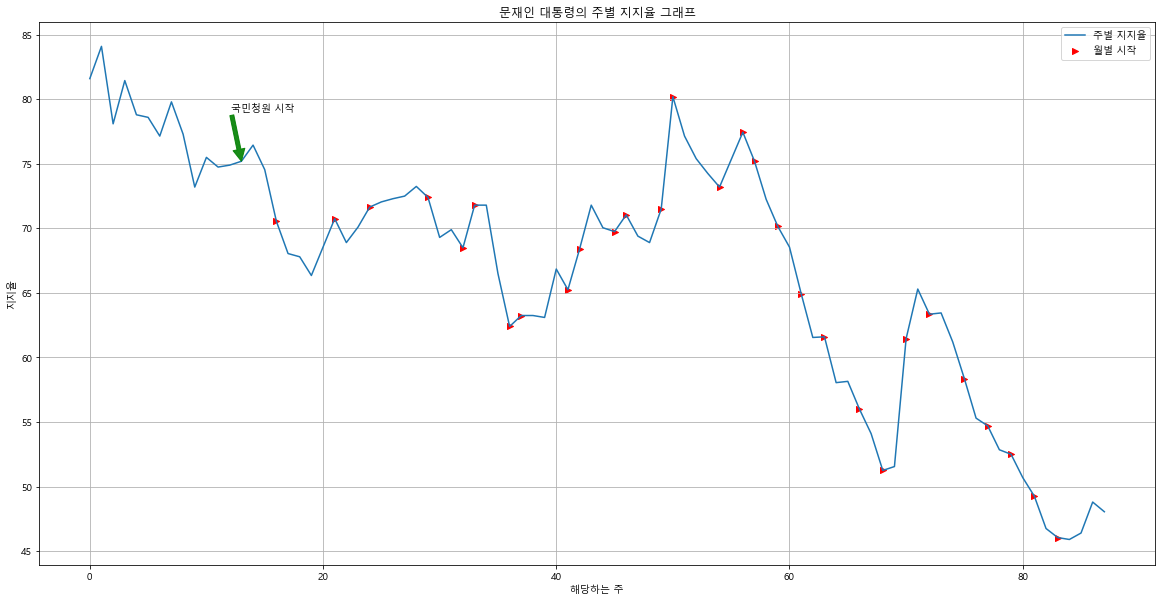

In [178]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(dd,test, label = "주별 지지율")

plt.scatter(kk,gg, color='r', marker='>', label = "월별 시작")

plt.annotate('국민청원 시작',
             xy=(13,75.2), 
             xytext=(-10, +50), textcoords='offset points', arrowprops = dict(color= 'g', alpha = 0.9))


plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

2017년 8월 17일에 공식 출범했다.

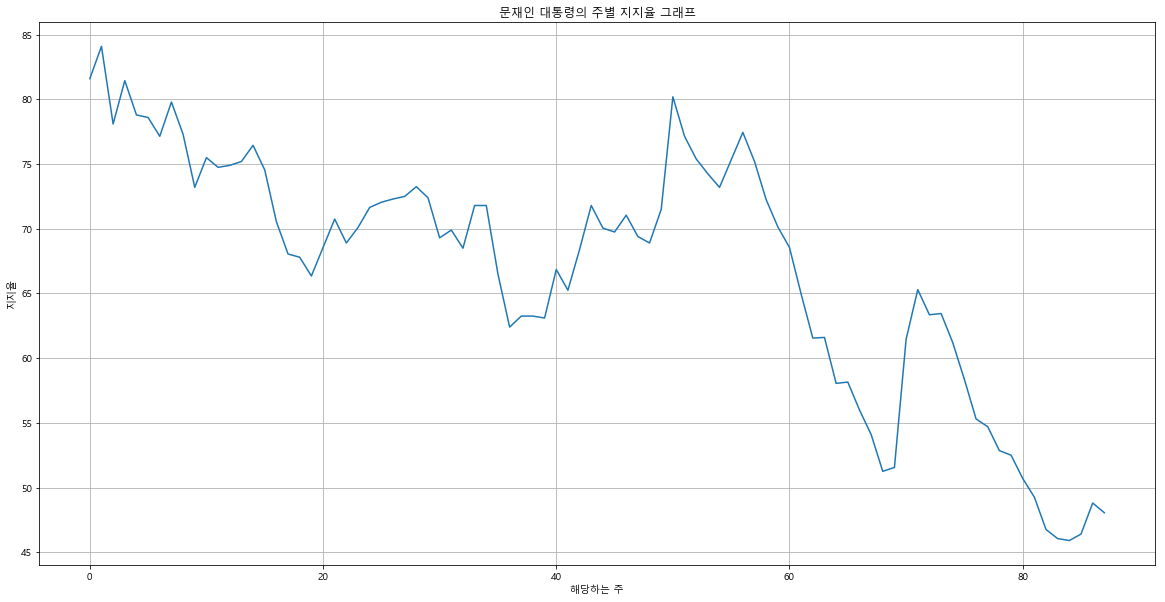

In [179]:
plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(dd,test)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()